In [1]:
import pickle as pk
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as dates

In [2]:
with open('/home/jovyan/data/botpt/2019bottom_pressure15s_F.pkl', 'rb') as E:
    botpt_data = pk.load(E)
df_botptF = pd.DataFrame(botpt_data)
df_botptF['bottom_pressure'] = df_botptF['bottom_pressure'].astype(float)
df_botptF['depth']=df_botptF['bottom_pressure'].astype(float) * 0.670
#MJ03F_cal_depths = [MJ03F_pressure * 0.0670 for MJ03F_pressure in MJ03F_pressure]
#list comprehention
epoch= [i.timestamp() for i in df_botptF.index.to_pydatetime()]
df_botptF['epoch'] = epoch
df_botptF= df_botptF.sort_index()
df_botptF.index.name= 'Date'
del df_botptF['epoch']
del df_botptF['bottom_pressure']
df_botptF.tail()

,depth
Date,
2019-06-27 23:58:45,1510.264895
2019-06-27 23:59:00,1510.266367
2019-06-27 23:59:15,1510.267839
2019-06-27 23:59:30,1510.268494
2019-06-27 23:59:45,1510.269148


In [3]:
with open('/home/jovyan/data/botpt/2019bottom_pressure15s_E.pkl', 'rb') as E:
    botpt_data = pk.load(E)
df_botptE = pd.DataFrame(botpt_data)
df_botptE['bottom_pressure'] = df_botptE['bottom_pressure'].astype(float)
df_botptE['depth']=df_botptE['bottom_pressure'].astype(float) * 0.670
#MJ03F_cal_depths = [MJ03F_pressure * 0.0670 for MJ03F_pressure in MJ03F_pressure]
#list comprehention
epoch= [i.timestamp() for i in df_botptE.index.to_pydatetime()]
df_botptE['epoch'] = epoch
df_botptE= df_botptE.sort_index()
df_botptE.index.name= 'Date'
del df_botptE['epoch']
del df_botptE['bottom_pressure']
df_botptE.head()

,depth
Date,
2017-01-01 00:00:00,1502.244033
2017-01-01 00:00:15,1502.242725
2017-01-01 00:00:30,1502.239944
2017-01-01 00:00:45,1502.237327
2017-01-01 00:01:00,1502.235200


#### Merge BOTPT E and BOTPT F 

In [4]:
test = pd.merge(df_botptF, df_botptE,how='outer', indicator=True, left_index=True, right_index=True, suffixes=('_F', '_E'))

In [5]:
df_botptMerge = test[test['_merge'] == 'both']
del df_botptMerge['_merge']
del df_botptF
del df_botptE

In [6]:
df_botptMerge = df_botptMerge.loc['2017-1-1 00:00:00':'2017-01-30 00:00:00']

In [7]:
df_botptMerge

,depth_F,depth_E
Date,,
2017-01-01 00:00:00,1511.468474,1502.244033
2017-01-01 00:00:15,1511.466184,1502.242725
2017-01-01 00:00:30,1511.464875,1502.239944
2017-01-01 00:00:45,1511.463894,1502.237327
2017-01-01 00:01:00,1511.460786,1502.235200
...,...,...
2017-01-29 23:59:00,1511.284126,1502.078496
2017-01-29 23:59:15,1511.282000,1502.078169
2017-01-29 23:59:30,1511.276765,1502.074734


#### Calculate Depth difference 

In [8]:
depthDiff = df_botptMerge['depth_E'].values - df_botptMerge['depth_F'].values

In [9]:
depthDiff

array([-9.22444092, -9.22345947, -9.22493164, ..., -9.20203125,
       -9.20612061, -9.21135498])

In [10]:
df_botptMerge['diff'] = depthDiff
# df_botptMerge['diff'] = abs(depthDiff)

In [11]:
df_botptMerge['diff'].head(5)

Date
2017-01-01 00:00:00   -9.224441
2017-01-01 00:00:15   -9.223459
2017-01-01 00:00:30   -9.224932
2017-01-01 00:00:45   -9.226567
2017-01-01 00:01:00   -9.225586
Name: diff, dtype: float64

In [12]:
depthDiff = df_botptMerge['diff'].abs()

In [13]:
depthDiff.head()

Date
2017-01-01 00:00:00    9.224441
2017-01-01 00:00:15    9.223459
2017-01-01 00:00:30    9.224932
2017-01-01 00:00:45    9.226567
2017-01-01 00:01:00    9.225586
Name: diff, dtype: float64

In [14]:
df_botptMerge['diff'] = depthDiff

#### Create time and height vectors for plotting 

In [15]:
# time = list(df_botptMerge.index.values)
#height = x.tolist()
height = df_botptMerge['diff'].tolist()
time_int = []
time = list(pd.to_datetime(df_botptMerge.index.values))
for i in time:
    i = np.datetime64(i).astype(datetime.datetime)
    time_int.append(dates.date2num(i))

#### Use Groupby to create one day mean measurements

In [16]:
df_botptMerge['date']=pd.DatetimeIndex(df_botptMerge.index).date
df_botptMerge

,depth_F,depth_E,diff,date
Date,,,,
2017-01-01 00:00:00,1511.468474,1502.244033,9.224441,2017-01-01
2017-01-01 00:00:15,1511.466184,1502.242725,9.223459,2017-01-01
2017-01-01 00:00:30,1511.464875,1502.239944,9.224932,2017-01-01
2017-01-01 00:00:45,1511.463894,1502.237327,9.226567,2017-01-01
2017-01-01 00:01:00,1511.460786,1502.235200,9.225586,2017-01-01
...,...,...,...,...
2017-01-29 23:59:00,1511.284126,1502.078496,9.205630,2017-01-29
2017-01-29 23:59:15,1511.282000,1502.078169,9.203831,2017-01-29
2017-01-29 23:59:30,1511.276765,1502.074734,9.202031,2017-01-29


In [17]:
df_botptMean=df_botptMerge.groupby('date').mean()
df_botptMean.tail(100)

,depth_F,depth_E,diff
date,,,
2017-01-01,1511.190229,1501.968277,9.221951
2017-01-02,1511.150868,1501.930328,9.220541
2017-01-03,1511.144084,1501.923073,9.221010
2017-01-04,1511.154041,1501.934419,9.219622
2017-01-05,1511.157324,1501.938949,9.218375
2017-01-06,1511.154243,1501.934905,9.219338
2017-01-07,1511.186865,1501.968706,9.218159
2017-01-08,1511.203105,1501.985098,9.218008
2017-01-09,1511.335411,1502.083856,9.251555


In [18]:
df_test = df_botptMean.head(1000)
df_test.head(10)

,depth_F,depth_E,diff
date,,,
2017-01-01,1511.190229,1501.968277,9.221951
2017-01-02,1511.150868,1501.930328,9.220541
2017-01-03,1511.144084,1501.923073,9.221010
2017-01-04,1511.154041,1501.934419,9.219622
2017-01-05,1511.157324,1501.938949,9.218375
2017-01-06,1511.154243,1501.934905,9.219338
2017-01-07,1511.186865,1501.968706,9.218159
2017-01-08,1511.203105,1501.985098,9.218008
2017-01-09,1511.335411,1502.083856,9.251555


In [19]:
df_test['newdiff'] = df_test['diff'].diff()
df_test.head(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,depth_F,depth_E,diff,newdiff
date,,,,
2017-01-01,1511.190229,1501.968277,9.221951,NaN
2017-01-02,1511.150868,1501.930328,9.220541,-0.001411
2017-01-03,1511.144084,1501.923073,9.221010,0.000470
2017-01-04,1511.154041,1501.934419,9.219622,-0.001388
2017-01-05,1511.157324,1501.938949,9.218375,-0.001248
2017-01-06,1511.154243,1501.934905,9.219338,0.000963
2017-01-07,1511.186865,1501.968706,9.218159,-0.001179
2017-01-08,1511.203105,1501.985098,9.218008,-0.000152
2017-01-09,1511.335411,1502.083856,9.251555,0.033547


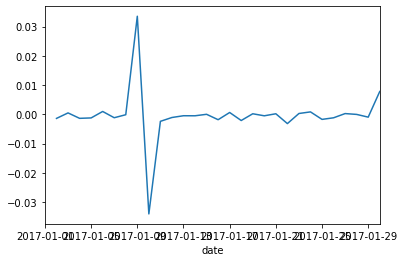

In [23]:
df_test['newdiff'].plot()

In [20]:
max = 0
for index,row in df_test.iterrows():
    if row['diff']>max:
        max = row['diff']
        df_test.at[index,'state'] = 2
    else:
        if row['newdiff']>0:
            df_test.at[index,'state'] = 1
        else:
            df_test.at[index,'state'] = -1
    df_test.at[index,'new'] = max
        
df_test.head(20)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.p

,depth_F,depth_E,diff,newdiff,state,new
date,,,,,,
2017-01-01,1511.190229,1501.968277,9.221951,NaN,2.0,9.221951
2017-01-02,1511.150868,1501.930328,9.220541,-0.001411,-1.0,9.221951
2017-01-03,1511.144084,1501.923073,9.221010,0.000470,1.0,9.221951
2017-01-04,1511.154041,1501.934419,9.219622,-0.001388,-1.0,9.221951
2017-01-05,1511.157324,1501.938949,9.218375,-0.001248,-1.0,9.221951
2017-01-06,1511.154243,1501.934905,9.219338,0.000963,1.0,9.221951
2017-01-07,1511.186865,1501.968706,9.218159,-0.001179,-1.0,9.221951
2017-01-08,1511.203105,1501.985098,9.218008,-0.000152,-1.0,9.221951
2017-01-09,1511.335411,1502.083856,9.251555,0.033547,2.0,9.251555


In [21]:
df_test.state.plot(marker='.',linestyle='')